<a href="https://colab.research.google.com/github/wheyland/poker/blob/main/DQN_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install rlcard[torch]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 269.0/269.0 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 72.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 57.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 87.4 MB/s eta 0:00:00
  Created wheel for rlcard: filename=rlcard-1.2.0-py3-none-any.whl size=325795 sh

In [ ]:
import torch
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Iteration 0
----------------------------------------
  episode      |  0
  reward       |  1.6035
----------------------------------------
INFO - Step 100, rl-loss: 1905.4951171875
INFO - Copied model parameters to target network.
INFO - Step 1099, rl-loss: 1746.635498046875
INFO - Saved model checkpoint.
INFO - Step 1100, rl-loss: 2187.171142578125
INFO - Copied model parameters to target network.
Iteration 1000
----------------------------------------
  episode      |  1000
  reward       |  2.7805
----------------------------------------
INFO - Step 2099, rl-loss: 2174.995361328125
INFO - Saved model checkpoint.
INFO - Step 2100, rl-loss: 1958.2982177734375
INFO - Copied model parameters to target network.
Iteration 2000
----------------------------------------
  episode      |  2000
  reward       |  1.494
----------------------------------------
INFO - Step 3099, rl-loss: 1106.80419921875
INFO - Saved model checkpoint.
INFO - Step 3100, rl-loss: 1613.4737548828125
INFO - Copied mo

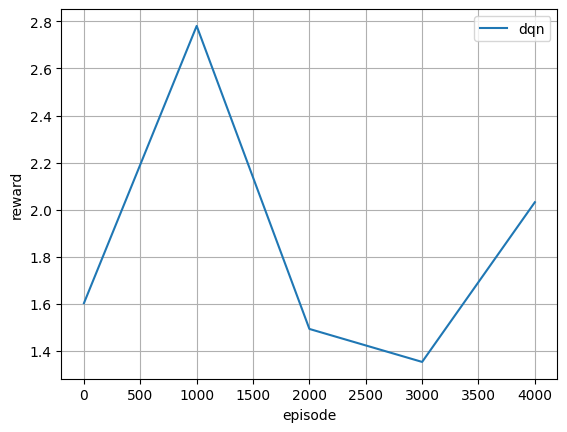

In [ ]:
import os
import argparse

import rlcard
from rlcard.agents import (
    RandomAgent,
    DQNAgent
)
from rlcard.utils import (
    set_seed,
    tournament,
    Logger,
    plot_curve,
    reorganize,
)

def train(agent_type, game_type = 'no-limit-holdem', seed = 42, num_episodes = 5000, evaluate_every = 1000, num_eval_games = 2000, log_dir = "cfr/"):
    env = rlcard.make(
        game_type,
        config={
            'seed': 0,
            'allow_step_back': True,
        }
    )

    eval_env = rlcard.make(
        game_type,
        config={
            'seed': 0,
        }
    )

    set_seed(seed)

    #agent.load()  # Load a saved model if available
    if agent_type == "dqn":

      agent = DQNAgent(
          num_actions=env.num_actions,
          state_shape=env.state_shape[0],
          mlp_layers=[64,64],
          save_path = log_dir,
          save_every = num_episodes / 5,
      )

      env.set_agents([agent, agent])

    # Set evaluation environment agents
    eval_env.set_agents([
        agent,
        RandomAgent(num_actions=env.num_actions),
    ])

    # Start training process
    with Logger(log_dir) as logger:
        for episode in range(num_episodes):
            if agent_type == "cfr":
              agent.train()
            elif agent_type == "dqn":
              trajectories, payoffs = env.run(is_training=True)

              # state, action, reward, next_state, done format
              trajectories = reorganize(trajectories, payoffs)

              # Feed transitions into agent memory and train the agent
              for ts in trajectories[0]:
                  agent.feed(ts)

            print('\rIteration {}'.format(episode), end='')
            # Periodically evaluate the agent's performance against random agents
            if episode % evaluate_every == 0:
                if agent_type == "cfr":
                  agent.save()  # Save the model

                logger.log_performance(
                    episode,
                    tournament(
                        eval_env,
                        num_eval_games
                    )[0]
                )

        # Retrieve paths for logging data
        csv_path, fig_path = logger.csv_path, logger.fig_path
    # Plot the learning curve based on logged performance data
    plot_curve(csv_path, fig_path, agent_type)


agent_type = "dqn"
game_type = "no-limit-holdem"
train(agent_type, game_type = game_type, num_episodes = 5000, log_dir = agent_type + "-" + game_type + "/")


Play No-Limit Texas Hold-em against your AI

In [ ]:
!pip3 install pettingzoo

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 852.5/852.5 kB 9.9 MB/s eta 0:00:00


In [ ]:
import pettingzoo
from pettingzoo.classic import texas_holdem_no_limit_v6

In [ ]:
import rlcard
from rlcard import models
from rlcard.agents import NolimitholdemHumanAgent
from rlcard.utils import print_card
from rlcard.agents.dqn_agent import Transition


env = rlcard.make('no-limit-holdem')
#env = texas_holdem_no_limit_v6.env(num_players=5)

#human_agent = NolimitholdemHumanAgent(env.num_actions)
random1 = RandomAgent(num_actions=env.num_actions)
random2 = RandomAgent(num_actions=env.num_actions)
random3 = RandomAgent(num_actions=env.num_actions)
random4 = RandomAgent(num_actions=env.num_actions)

dqn_agent = DQNAgent(
          num_actions=env.num_actions,
          state_shape=env.state_shape[0],
          mlp_layers=[64,64],
          save_path = "dqn/",
          )

checkpoint = torch.load("dqn-no-limit-holdem/checkpoint_dqn.pt",
                        weights_only=False) # Allowlist the Transition global) # add safe_globals to load)
dqn_agent.from_checkpoint(checkpoint)

# cfr_agent = models.load('leduc-holdem-cfr').agents[0]
env.set_agents([
    dqn_agent,
    #human_agent,
    random1,
    random2,
    random3,
    random4
])

print(">> Play No-Limit Texas Holdem against a random agent")

while (True):
    print(">> Start a new game")

    trajectories, payoffs = env.run(is_training=False)
    # If the human does not take the final action, we need to
    # print other players action
    print(trajectories)
    final_state = trajectories[0][-1]
    action_record = final_state['action_record']
    state = final_state['raw_obs']
    _action_list = []
    for i in range(1, len(action_record)+1):
        if action_record[-i][0] == state['current_player']:
            break
        _action_list.insert(0, action_record[-i])
    for pair in _action_list:
        print('>> Player', pair[0], 'chooses', pair[1])


    print('===============  Community Cards  ===============')
    community_cards = final_state['raw_obs']['public_cards']
    print_card(community_cards)

    # Let's take a look at what the agent card is
    print('===============     DQN Agent    ===============')
    print_card(env.get_perfect_information()['hand_cards'][0])


    print('===============     Result     ===============')
    if payoffs[0] > 0:
        print('You win {} chips!'.format(payoffs[0]))
    elif payoffs[0] == 0:
        print('It is a tie.')
    else:
        print('You lose {} chips!'.format(-payoffs[0]))
    print('')


Streaming output truncated to the last 5000 lines.
│9        │   │6        │   │9        │   │J        │   │4        │
│         │   │         │   │         │   │         │   │         │
│         │   │         │   │         │   │         │   │         │
│    ♠    │   │    ♥    │   │    ♦    │   │    ♣    │   │    ♥    │
│         │   │         │   │         │   │         │   │         │
│         │   │         │   │         │   │         │   │         │
│        9│   │        6│   │        9│   │        J│   │        4│
└─────────┘   └─────────┘   └─────────┘   └─────────┘   └─────────┘
===============     DQN Agent    ===============
┌─────────┐   ┌─────────┐
│3        │   │7        │
│         │   │         │
│         │   │         │
│    ♥    │   │    ♠    │
│         │   │         │
│         │   │         │
│        3│   │        7│
└─────────┘   └─────────┘
===============     Result     ===============
You lose 2 chips!

>> Start a new game
[[{'legal_actions': OrderedDict([(0,

KeyboardInterrupt: 